In [1]:
exp_name = '2022-11-30_19-37-32'
fname1 = f'Data/{exp_name}_uart1.sole'
fname2 = f'Data/{exp_name}_uart2.sole'

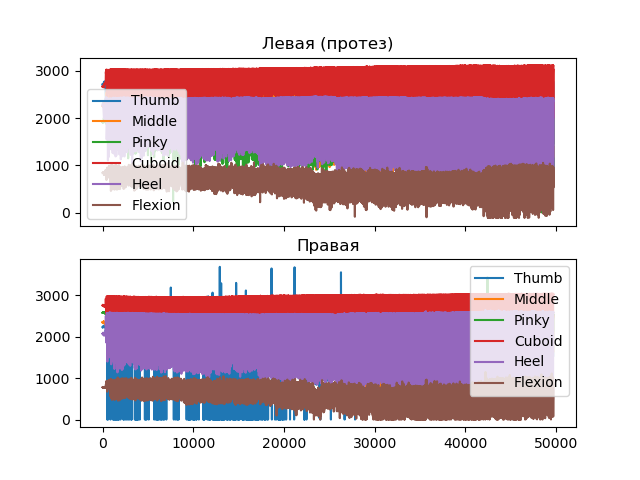

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

import mne

import scipy

import numpy as np
%matplotlib widget

df1 = pd.read_csv(fname1, sep = ' ', header=None)[[0,1,2,3,4,9]]\
        .rename(columns=dict(zip([0,1,2,3,4,9], ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel', 'Flexion'])))
df2 = pd.read_csv(fname2, sep = ' ', header=None)[[0,1,2,3,4,9]]\
        .rename(columns=dict(zip([0,1,2,3,4,9], ['Thumb', 'Middle', 'Pinky', 'Cuboid', 'Heel', 'Flexion'])))

min_l = min(len(df1), len(df2))
df1 = df1.iloc[:min_l]
df2 = df2.iloc[:min_l]

df1.Flexion -= df1.Flexion.quantile(0.005)
df1.Flexion /= df1.Flexion.quantile(0.995)/1000

df2.Flexion -= df2.Flexion.quantile(0.005)
df2.Flexion /= df2.Flexion.quantile(0.995)/1000

fig, axx = plt.subplots(2,1,sharex=True)

plt.sca(axx[0])
plt.plot(df1)
plt.title('Левая (протез)')
plt.legend(df1.columns)

plt.sca(axx[1])
plt.plot(df2)
plt.title('Правая')
plt.legend(df2.columns)

Setting up band-pass filter from 0.05 - 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.05 Hz (-6 dB cutoff frequency: 0.03 Hz)
- Upper passband edge: 0.50 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.50 Hz)
- Filter length: 4401 samples (66.015 sec)

Setting up band-pass filter from 0.05 - 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.05
- Lower transition bandwidth: 0.05 Hz (-6 dB cutoff frequency: 0.03 Hz)
- Upper passband edge: 0.50 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.50 Hz

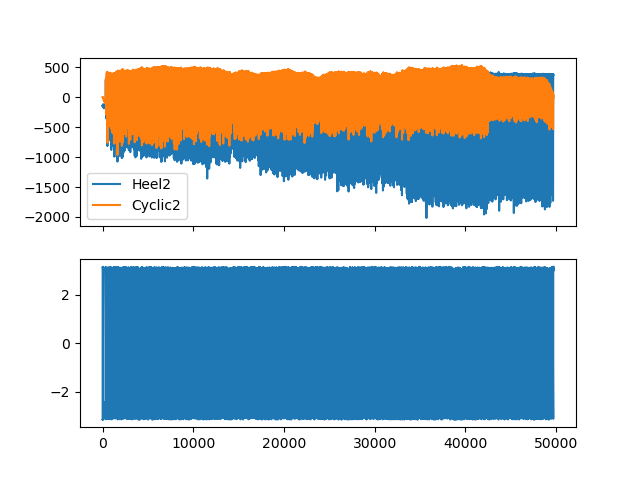

In [10]:
sfreq = 1000/15

cyclic_metric1 = mne.filter.filter_data(df1.Heel.values.reshape(-1).astype(float), sfreq=sfreq, l_freq=0.05, h_freq=0.5)
cyclic_metric2 = mne.filter.filter_data(df2.Heel.values.reshape(-1).astype(float), sfreq=sfreq, l_freq=0.05, h_freq=0.5)

fig, axx = plt.subplots(2,1, sharex=True)
plt.sca(axx[0])
# plt.plot(df1.Heel.values - df1.Heel.mean())
plt.plot(df2.Heel.values - df2.Heel.mean())
# plt.plot(cyclic_metric1)
plt.plot(cyclic_metric2)
# plt.legend(['Heel1', 'Heel2', 'Cyclic1', 'Cyclic2'])
plt.legend(['Heel2', 'Cyclic2'])

plt.sca(axx[1])
analog = scipy.signal.hilbert(cyclic_metric2)
phase = np.arctan2(np.real(analog), np.imag(analog))
plt.plot(phase)

In [11]:
phase.shape, df1[c].shape

((49702,), (49702,))

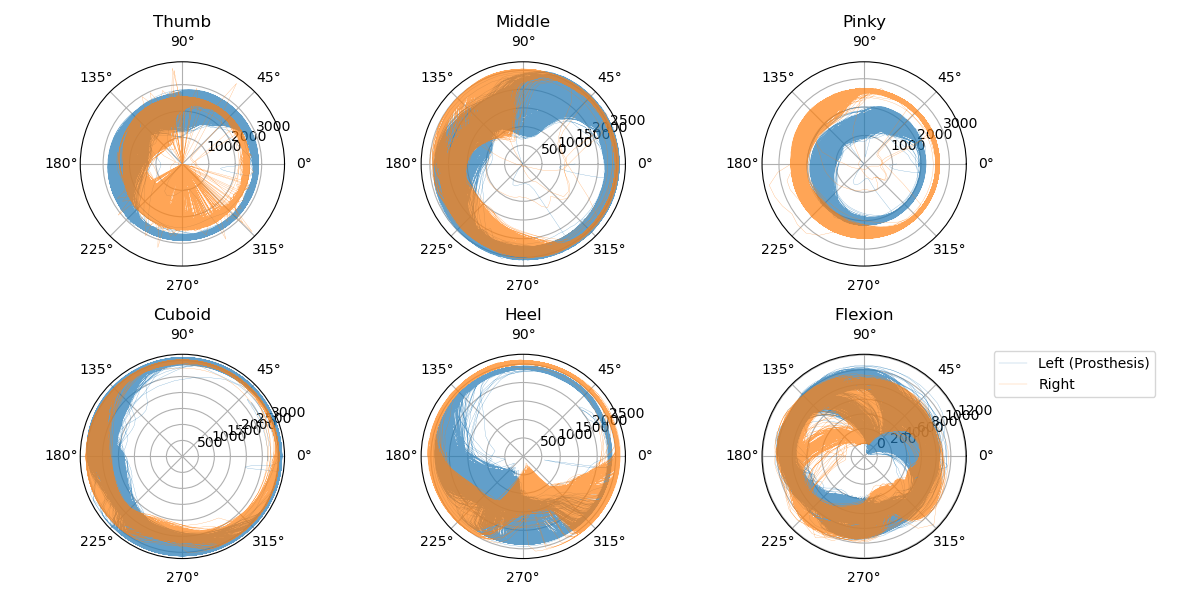

In [12]:
fig, axx = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(12,6))
for i, c in enumerate(df1.columns):
    plt.sca(axx.reshape(-1)[i])
    plt.plot(phase+np.pi, df1[c], alpha=0.7, lw=0.2)
    plt.plot(phase, df2[c], alpha=0.7, lw=0.2)

    plt.title(c)
    
plt.legend(['Left (Prosthesis)', 'Right'], bbox_to_anchor=(1.1, 1.05))

plt.tight_layout()